# Análisis Exploratorio de Datos (EDA)
## Dataset de Inventario y Gestión de Stock

Este documento presenta un análisis exploratorio exhaustivo del dataset de gestión de inventario. El objetivo es comprender la estructura de los datos, identificar patrones, detectar anomalías y generar insights que permitan una mejor toma de decisiones en la gestión de stock.

## 1. Importación de Librerías

Importamos las librerías necesarias para el análisis exploratorio, incluyendo herramientas para manipulación de datos, visualización y análisis estadístico.

In [2]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Análisis estadístico
from scipy import stats
from scipy.stats import normaltest, skew, kurtosis

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


## 2. Carga de Datos

Cargamos el dataset desde el archivo CSV y realizamos una primera inspección de la estructura de los datos.

In [4]:
# Cargar el dataset
df = pd.read_csv('dataset.csv')

# Información básica del dataset
print("INFORMACIÓN GENERAL DEL DATASET")
print(f"\nDimensiones del dataset: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nPrimeras 5 filas del dataset:")
print("=" * 80)
df.head()

INFORMACIÓN GENERAL DEL DATASET

Dimensiones del dataset: 7,500 filas x 37 columnas
Tamaño en memoria: 7.52 MB

Primeras 5 filas del dataset:


,id,created_at,product_id,product_name,product_sku,supplier_id,supplier_name,prioridad_proveedor,quantity_on_hand,quantity_reserved,quantity_available,minimum_stock_level,reorder_point,optimal_stock_level,reorder_quantity,average_daily_usage,last_order_date,last_stock_count_date,unit_cost,total_value,expiration_date,batch_number,warehouse_location,shelf_location,region_almacen,stock_status,is_active,last_updated_at,created_by_id,record_sequence_number,categoria_producto,subcategoria_producto,anio,mes,vacaciones_o_no,es_feriado,temporada_alta
0,1,2024-01-01,103,Barra Cereal Choco,CRT-103,203,Proveedor C,3,380,27,353,80,180,500,0,22.000,2023-12-25,2023-12-31,0.700,266.000,2025-10-30,BATCH-C1,Almacén Central,Pasillo 3,Sur,activo,1,2024-01-01,503,3,Snacks,Barras de Cereal,2024,1,False,True,True
1,2,2024-01-02,103,Barra Cereal Choco,CRT-103,203,Proveedor C,3,358,36,322,80,180,500,0,20.000,2024-01-01,2023-12-30,0.700,250.600,2025-10-30,BATCH-C1,Almacén Central,Pasillo 3,Sur,activo,1,2024-01-02,503,3,Snacks,Barras de Cereal,2024,1,False,False,True
2,3,2024-01-03,103,Barra Cereal Choco,CRT-103,203,Proveedor C,3,438,11,427,80,180,500,0,20.000,2024-01-01,2023-12-31,0.700,306.600,2025-10-30,BATCH-C1,Almacén Central,Pasillo 3,Sur,activo,1,2024-01-03,503,3,Snacks,Barras de Cereal,2024,1,False,False,True
3,4,2024-01-04,103,Barra Cereal Choco,CRT-103,203,Proveedor C,3,419,28,391,80,180,500,0,20.000,2023-12-29,2024-01-03,0.700,293.300,2025-10-30,BATCH-C1,Almacén Central,Pasillo 3,Sur,activo,1,2024-01-04,503,3,Snacks,Barras de Cereal,2024,1,False,False,True
4,5,2024-01-05,103,Barra Cereal Choco,CRT-103,203,Proveedor C,3,398,21,377,80,180,500,0,20.000,2023-12-29,2024-01-03,0.700,278.600,2025-10-30,BATCH-C1,Almacén Central,Pasillo 3,Sur,activo,1,2024-01-05,503,3,Snacks,Barras de Cereal,2024,1,False,False,True


## 3. Análisis de la Estructura de Datos

Examinamos los tipos de datos, valores nulos y características generales de cada columna.

In [6]:
# Información detallada de las columnas
print("INFORMACIÓN DE COLUMNAS")
print("\nTipos de datos y valores no nulos:")
print(df.info())

print("\n" + "=" * 80)
print("RESUMEN DE VALORES NULOS")
print("=" * 80)
null_summary = pd.DataFrame({
    'Columna': df.columns,
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
null_summary = null_summary[null_summary['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)

if len(null_summary) > 0:
    print(null_summary.to_string(index=False))
else:
    print("No se encontraron valores nulos en el dataset.")

INFORMACIÓN DE COLUMNAS

Tipos de datos y valores no nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7500 non-null   int64  
 1   created_at              7500 non-null   object 
 2   product_id              7500 non-null   int64  
 3   product_name            7500 non-null   object 
 4   product_sku             7500 non-null   object 
 5   supplier_id             7500 non-null   int64  
 6   supplier_name           7500 non-null   object 
 7   prioridad_proveedor     7500 non-null   int64  
 8   quantity_on_hand        7500 non-null   int64  
 9   quantity_reserved       7500 non-null   int64  
 10  quantity_available      7500 non-null   int64  
 11  minimum_stock_level     7500 non-null   int64  
 12  reorder_point           7500 non-null   int64  
 13  optimal_stock_level     7500 non-

In [8]:
# Identificar tipos de variables
numericas = df.select_dtypes(include=[np.number]).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

print("CLASIFICACIÓN DE VARIABLES")
print(f"\nVariables Numéricas ({len(numericas)}):")
print(", ".join(numericas))
print(f"\nVariables Categóricas ({len(categoricas)}):")
print(", ".join(categoricas))

CLASIFICACIÓN DE VARIABLES

Variables Numéricas (19):
id, product_id, supplier_id, prioridad_proveedor, quantity_on_hand, quantity_reserved, quantity_available, minimum_stock_level, reorder_point, optimal_stock_level, reorder_quantity, average_daily_usage, unit_cost, total_value, is_active, created_by_id, record_sequence_number, anio, mes

Variables Categóricas (15):
created_at, product_name, product_sku, supplier_name, last_order_date, last_stock_count_date, expiration_date, batch_number, warehouse_location, shelf_location, region_almacen, stock_status, last_updated_at, categoria_producto, subcategoria_producto


## 4. Estadísticas Descriptivas

Análisis estadístico de las variables numéricas para comprender la distribución, tendencia central y dispersión de los datos.

In [33]:
# Estadísticas descriptivas de variables numéricas
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
desc_stats = df[numericas].describe().T
desc_stats['skewness'] = df[numericas].apply(lambda x: skew(x.dropna()))
desc_stats['kurtosis'] = df[numericas].apply(lambda x: kurtosis(x.dropna()))
print(desc_stats)

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
                          count     mean      std      min      25%      50%  \
id                     7500.000  250.500  144.347    1.000  125.750  250.500   
product_id             7500.000  108.000    4.321  101.000  104.000  108.000   
supplier_id            7500.000  202.533    1.258  201.000  201.000  202.000   
prioridad_proveedor    7500.000    1.867    0.718    1.000    1.000    2.000   
quantity_on_hand       7500.000 1515.789 1278.526  120.000  529.750 1107.000   
quantity_reserved      7500.000   39.774   20.936   10.000   23.000   35.000   
quantity_available     7500.000 1476.014 1286.108   54.000  483.750 1067.000   
minimum_stock_level    7500.000  121.333   36.857   70.000   90.000  120.000   
reorder_point          7500.000  258.000   77.911  150.000  190.000  230.000   
optimal_stock_level    7500.000  683.333  209.511  400.000  500.000  600.000   
reorder_quantity       7500.000   28.720   74.956    0.000    0.000    0

In [12]:
# Análisis de variables categóricas
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")

for col in categoricas[:]: # 5 primeras para no saturar
    unique_count = df[col].nunique()
    print(f"\n{col}:")
    print(f"  - Valores únicos: {unique_count}")
    if unique_count <= 10:
        print(f"  - Distribución:")
        print(df[col].value_counts().to_string(header=False))

ANÁLISIS DE VARIABLES CATEGÓRICAS

created_at:
  - Valores únicos: 500

product_name:
  - Valores únicos: 15

product_sku:
  - Valores únicos: 15

supplier_name:
  - Valores únicos: 5
  - Distribución:
Proveedor A    2000
Proveedor B    2000
Proveedor C    1500
Proveedor D    1500
Proveedor E     500

last_order_date:
  - Valores únicos: 508

last_stock_count_date:
  - Valores únicos: 503

expiration_date:
  - Valores únicos: 15

batch_number:
  - Valores únicos: 15

warehouse_location:
  - Valores únicos: 1
  - Distribución:
Almacén Central    7500

shelf_location:
  - Valores únicos: 15

region_almacen:
  - Valores únicos: 1
  - Distribución:
Sur    7500

stock_status:
  - Valores únicos: 1
  - Distribución:
activo    7500

last_updated_at:
  - Valores únicos: 500

categoria_producto:
  - Valores únicos: 1
  - Distribución:
Snacks    7500

subcategoria_producto:
  - Valores únicos: 4
  - Distribución:
Barras de Cereal    2000
Chips               2000
Galletas            2000
Palomita

## 5. Detección de Valores Atípicos (Outliers)

Identificamos valores atípicos utilizando el método de rango intercuartílico (IQR) para las variables numéricas más relevantes.

In [14]:
# Función para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("DETECCIÓN DE VALORES ATÍPICOS (IQR)")

outlier_summary = []
for col in numericas:
    if df[col].nunique() > 10:  # Solo para variables con suficiente variación
        n_outliers, lower, upper = detect_outliers_iqr(df, col)
        if n_outliers > 0:
            outlier_summary.append({
                'Variable': col,
                'N° Outliers': n_outliers,
                'Porcentaje (%)': round(n_outliers / len(df) * 100, 2),
                'Límite Inferior': round(lower, 2),
                'Límite Superior': round(upper, 2)
            })

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary).sort_values('N° Outliers', ascending=False)
    print(outlier_df.to_string(index=False))
else:
    print("No se detectaron outliers significativos en las variables numéricas.")

DETECCIÓN DE VALORES ATÍPICOS (IQR)
          Variable  N° Outliers  Porcentaje (%)  Límite Inferior  Límite Superior
       total_value          588           7.840        -1155.940         2676.010
         unit_cost          500           6.670            0.200            1.000
  quantity_on_hand          301           4.010        -1901.000         4581.000
quantity_available          299           3.990        -1972.880         4578.120


## 6. Visualización de Distribuciones

Análisis visual de las distribuciones de las principales variables numéricas del dataset.

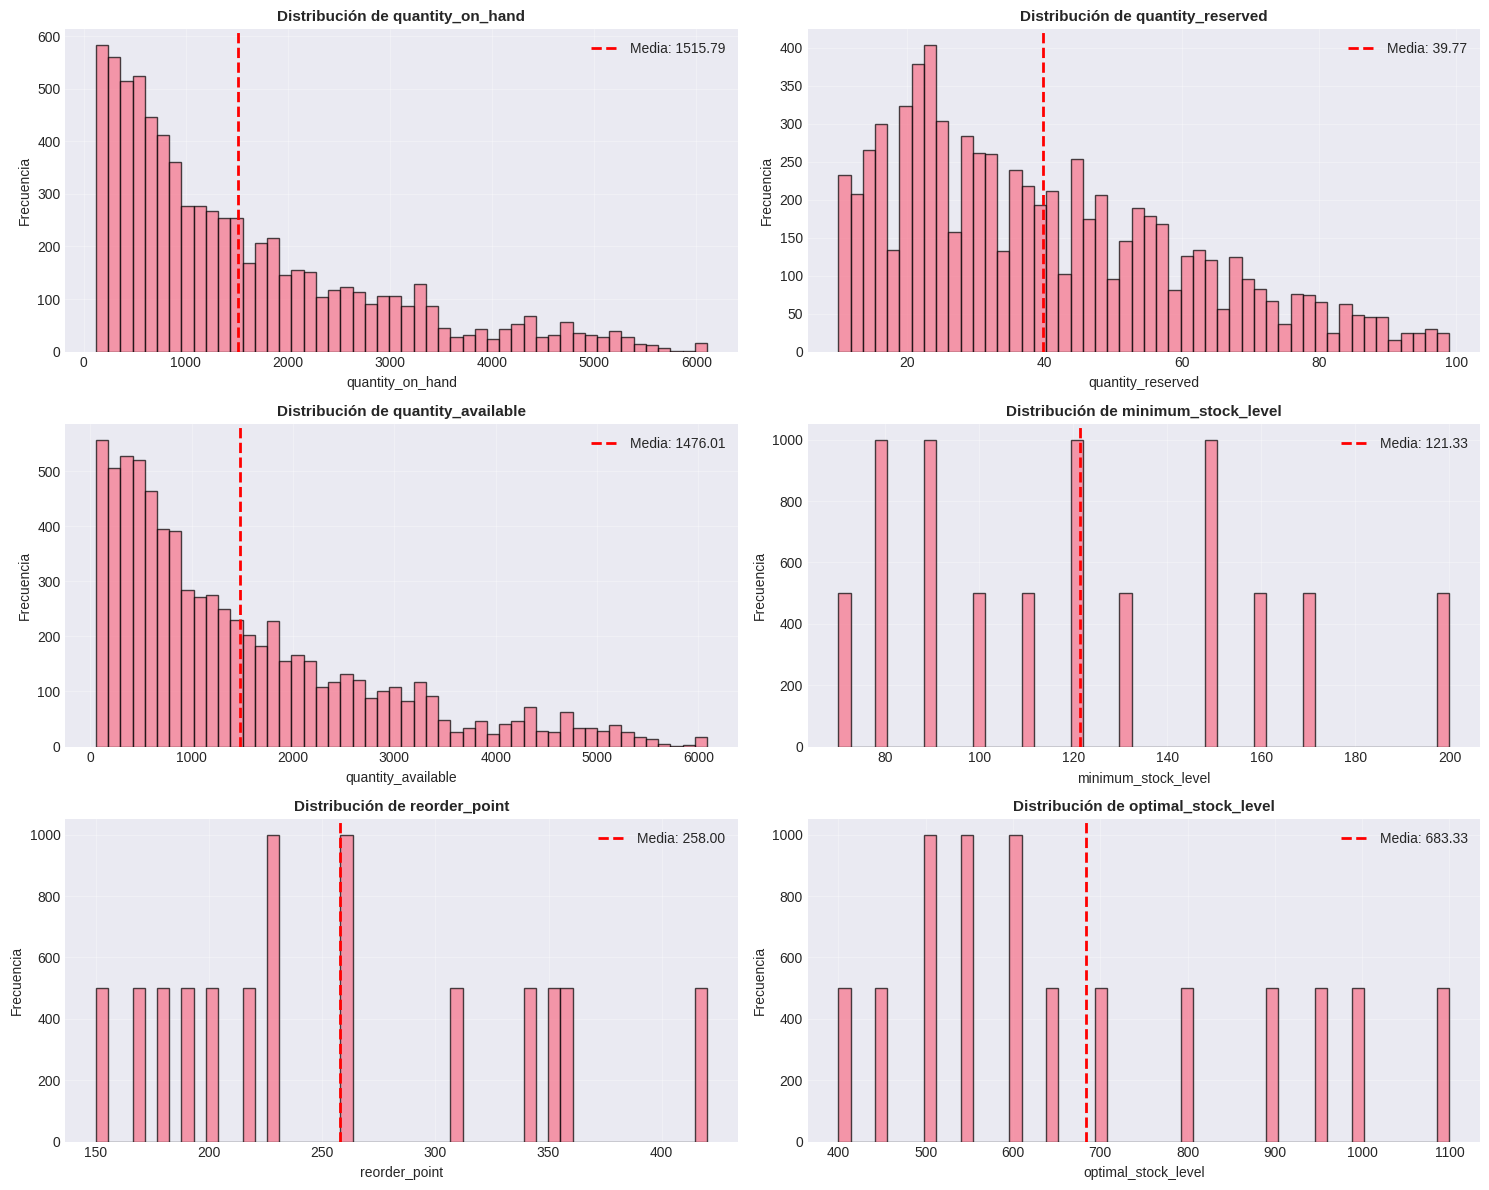

In [15]:
# Seleccionar variables clave de inventario para visualización
inventory_vars = ['quantity_on_hand', 'quantity_reserved', 'quantity_available', 
                  'minimum_stock_level', 'reorder_point', 'optimal_stock_level']

# Filtrar solo las que existen en el dataset
inventory_vars = [var for var in inventory_vars if var in numericas]

if len(inventory_vars) > 0:
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(inventory_vars[:6]):
        axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución de {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].grid(True, alpha=0.3)
        
        # Añadir línea de media
        mean_val = df[col].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
        axes[idx].legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron variables de inventario para visualizar.")

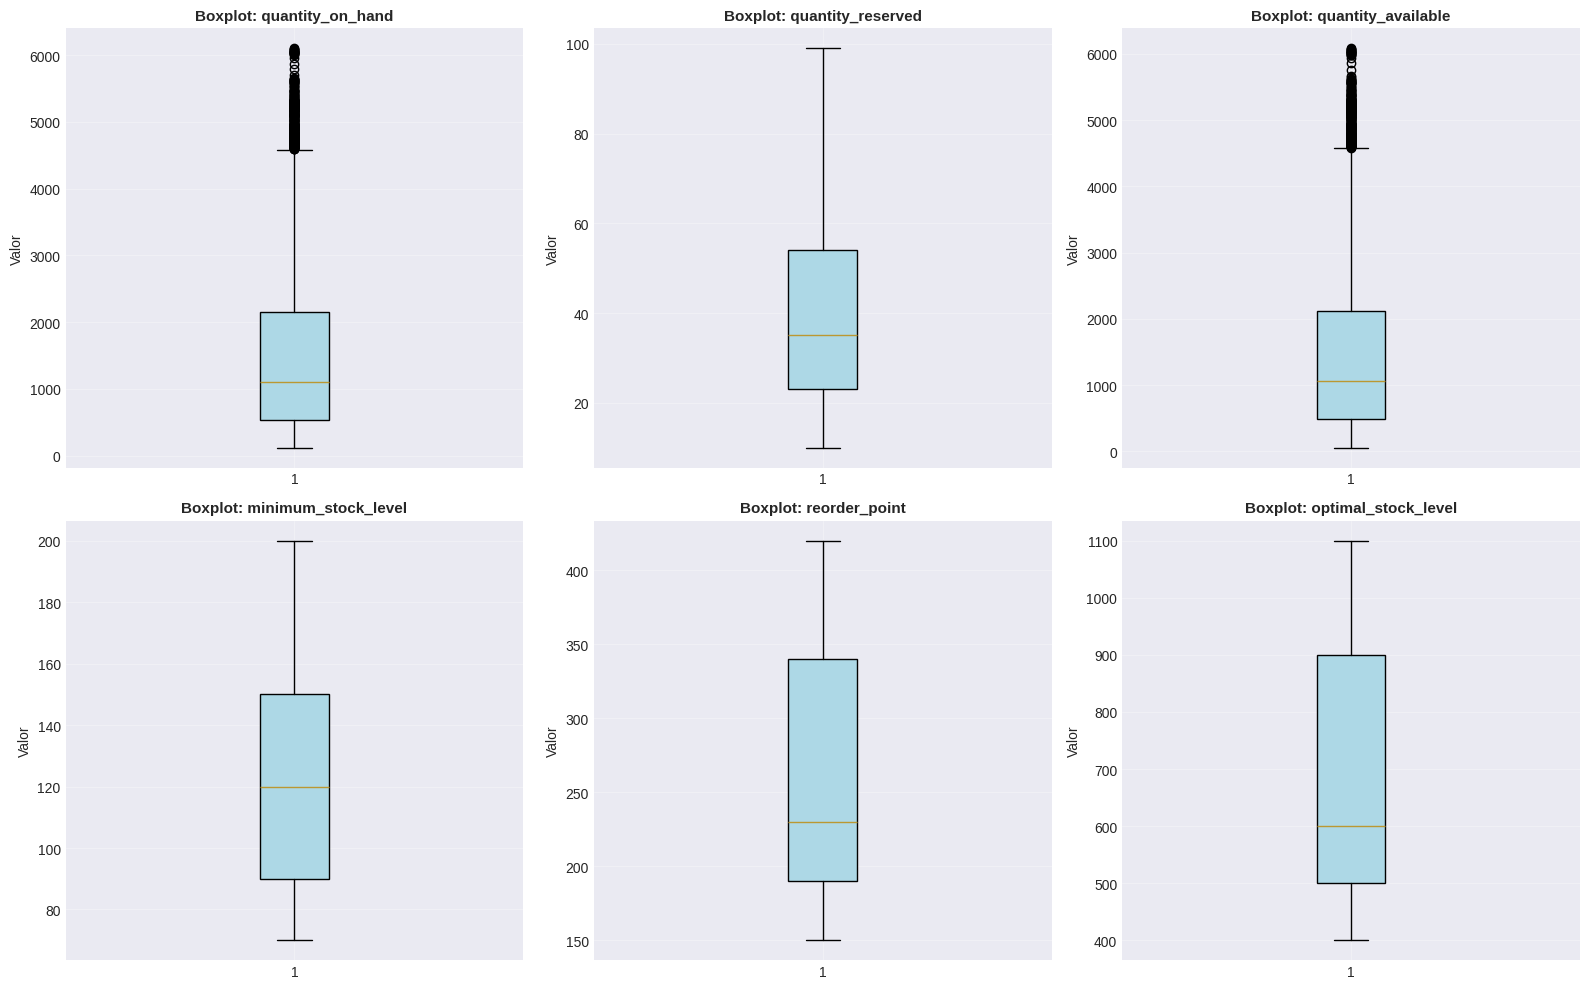

In [16]:
# Boxplots para identificar outliers visualmente
if len(inventory_vars) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(inventory_vars[:6]):
        bp = axes[idx].boxplot(df[col].dropna(), patch_artist=True)
        axes[idx].set_title(f'Boxplot: {col}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('Valor')
        axes[idx].grid(True, alpha=0.3)
        
        # Colorear el boxplot
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron variables de inventario para visualizar.")

## 7. Análisis de Correlaciones

Evaluamos las relaciones lineales entre variables numéricas mediante la matriz de correlación.

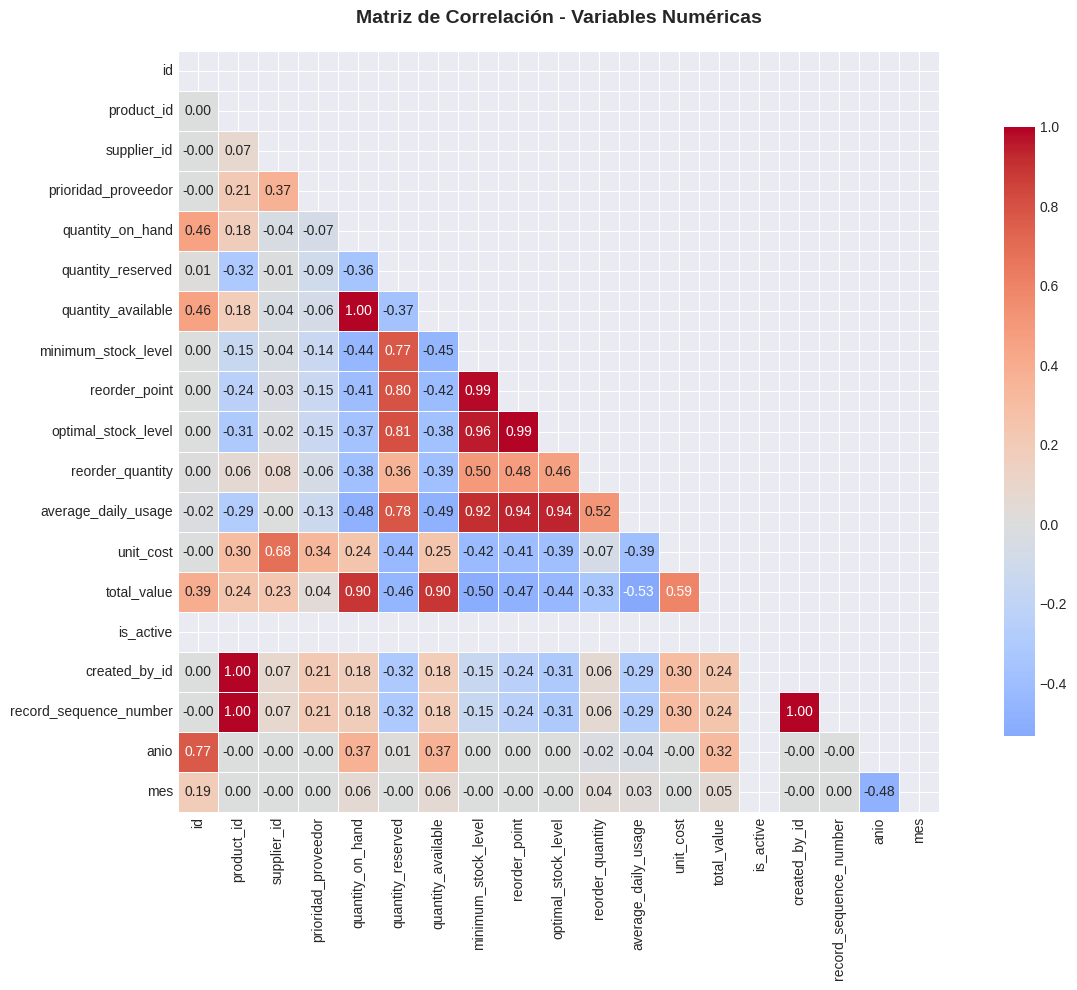

CORRELACIONES MÁS FUERTES (|r| > 0.7)
         Variable 1             Variable 2  Correlación
         product_id          created_by_id        1.000
   quantity_on_hand     quantity_available        1.000
         product_id record_sequence_number        1.000
      created_by_id record_sequence_number        1.000
      reorder_point    optimal_stock_level        0.991
minimum_stock_level          reorder_point        0.988
minimum_stock_level    optimal_stock_level        0.957
optimal_stock_level    average_daily_usage        0.938
      reorder_point    average_daily_usage        0.937
minimum_stock_level    average_daily_usage        0.915
 quantity_available            total_value        0.898
   quantity_on_hand            total_value        0.896
  quantity_reserved    optimal_stock_level        0.807
  quantity_reserved          reorder_point        0.800
  quantity_reserved    average_daily_usage        0.784
  quantity_reserved    minimum_stock_level        0.774
          

In [18]:
# Calcular matriz de correlación
correlation_matrix = df[numericas].corr()

# Visualizar matriz de correlación con heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("CORRELACIONES MÁS FUERTES (|r| > 0.7)")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_corr.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlación': round(correlation_matrix.iloc[i, j], 3)
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlación', ascending=False, key=abs)
    print(strong_corr_df.to_string(index=False))
else:
    print("No se encontraron correlaciones fuertes entre las variables.")

## 8. Análisis Temporal

Análisis de patrones temporales en el inventario, considerando tendencias y estacionalidad.

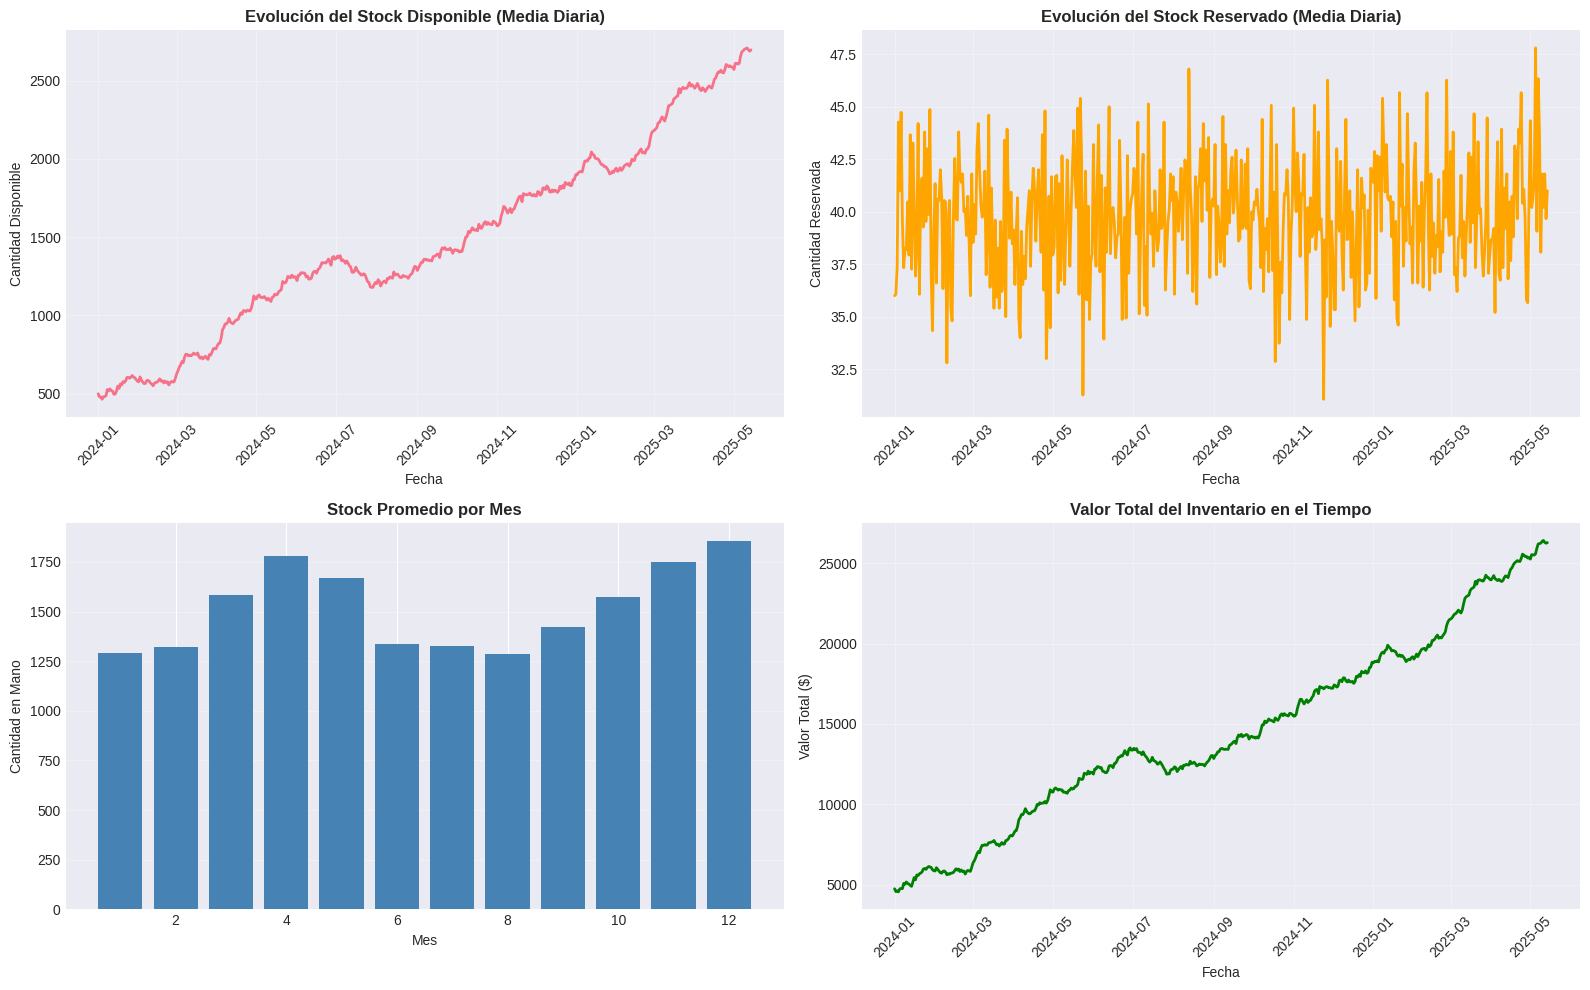

In [19]:
# Convertir columnas de fecha a datetime si existen
date_columns = ['created_at', 'last_order_date', 'last_stock_count_date', 
                'expiration_date', 'last_updated_at']

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Verificar si existe columna de fecha principal
if 'created_at' in df.columns:
    df_sorted = df.sort_values('created_at')
    
    # Análisis de tendencia temporal del inventario
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Evolución del stock disponible
    if 'quantity_available' in df.columns:
        daily_avg = df_sorted.groupby(df_sorted['created_at'].dt.date)['quantity_available'].mean()
        axes[0, 0].plot(daily_avg.index, daily_avg.values, linewidth=2)
        axes[0, 0].set_title('Evolución del Stock Disponible (Media Diaria)', fontweight='bold')
        axes[0, 0].set_xlabel('Fecha')
        axes[0, 0].set_ylabel('Cantidad Disponible')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Evolución del stock reservado
    if 'quantity_reserved' in df.columns:
        daily_reserved = df_sorted.groupby(df_sorted['created_at'].dt.date)['quantity_reserved'].mean()
        axes[0, 1].plot(daily_reserved.index, daily_reserved.values, color='orange', linewidth=2)
        axes[0, 1].set_title('Evolución del Stock Reservado (Media Diaria)', fontweight='bold')
        axes[0, 1].set_xlabel('Fecha')
        axes[0, 1].set_ylabel('Cantidad Reservada')
        axes[0, 1].grid(True, alpha=0.3)
        axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Análisis por mes
    if 'mes' in df.columns:
        monthly_stock = df.groupby('mes')['quantity_on_hand'].mean()
        axes[1, 0].bar(monthly_stock.index, monthly_stock.values, color='steelblue')
        axes[1, 0].set_title('Stock Promedio por Mes', fontweight='bold')
        axes[1, 0].set_xlabel('Mes')
        axes[1, 0].set_ylabel('Cantidad en Mano')
        axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Valor total del inventario en el tiempo
    if 'total_value' in df.columns:
        daily_value = df_sorted.groupby(df_sorted['created_at'].dt.date)['total_value'].sum()
        axes[1, 1].plot(daily_value.index, daily_value.values, color='green', linewidth=2)
        axes[1, 1].set_title('Valor Total del Inventario en el Tiempo', fontweight='bold')
        axes[1, 1].set_xlabel('Fecha')
        axes[1, 1].set_ylabel('Valor Total ($)')
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró columna de fecha para análisis temporal.")

## 9. Análisis Categórico

Exploración de las distribuciones de variables categóricas clave y su relación con variables numéricas.

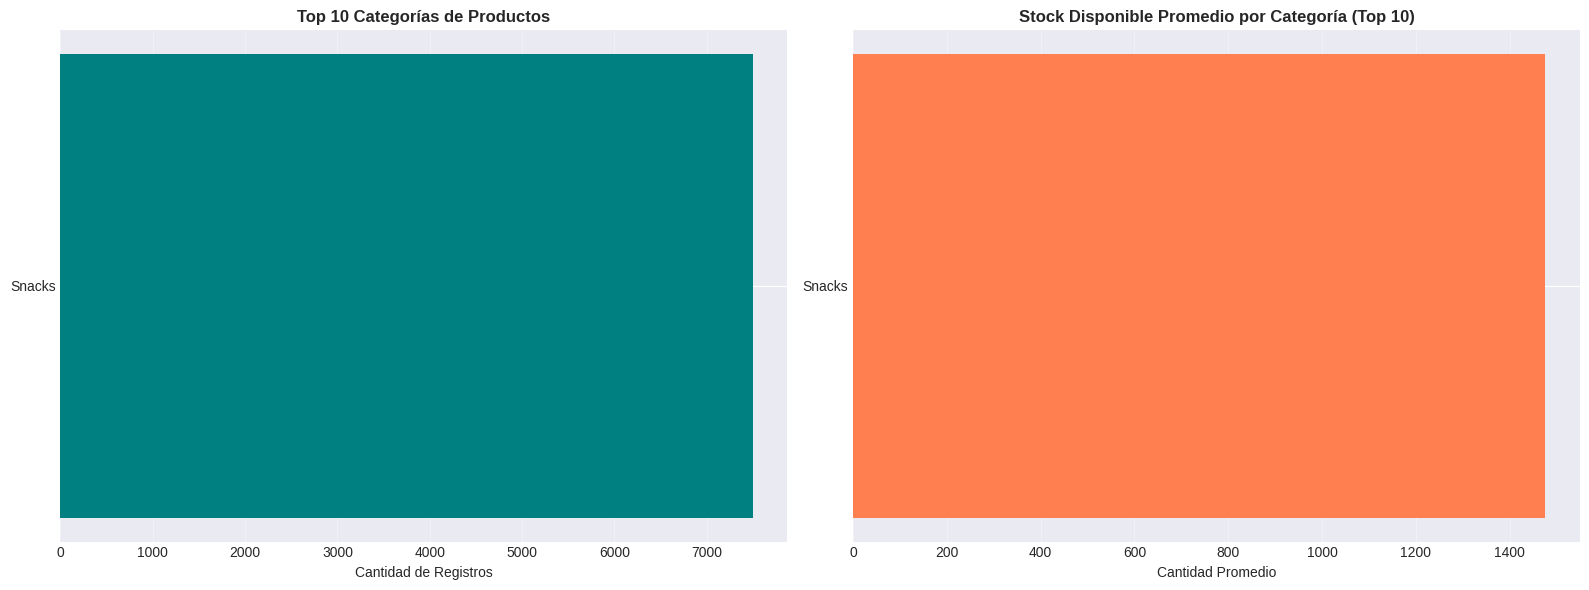

In [20]:
# Análisis de categorías de producto
if 'categoria_producto' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Distribución de categorías
    cat_counts = df['categoria_producto'].value_counts().head(10)
    axes[0].barh(cat_counts.index, cat_counts.values, color='teal')
    axes[0].set_title('Top 10 Categorías de Productos', fontweight='bold', fontsize=12)
    axes[0].set_xlabel('Cantidad de Registros')
    axes[0].grid(True, alpha=0.3, axis='x')
    
    # Stock promedio por categoría
    if 'quantity_available' in df.columns:
        cat_stock = df.groupby('categoria_producto')['quantity_available'].mean().sort_values(ascending=False).head(10)
        axes[1].barh(cat_stock.index, cat_stock.values, color='coral')
        axes[1].set_title('Stock Disponible Promedio por Categoría (Top 10)', fontweight='bold', fontsize=12)
        axes[1].set_xlabel('Cantidad Promedio')
        axes[1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró la columna 'categoria_producto'.")

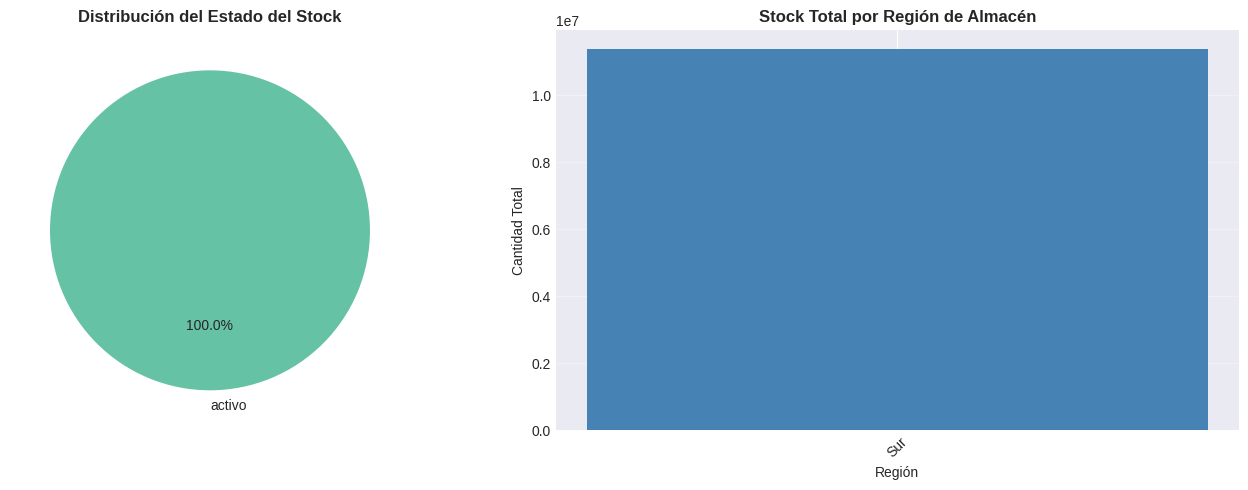

In [21]:
# Análisis del estado del stock
if 'stock_status' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Distribución del estado del stock
    status_counts = df['stock_status'].value_counts()
    axes[0].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
                startangle=90, colors=sns.color_palette('Set2'))
    axes[0].set_title('Distribución del Estado del Stock', fontweight='bold', fontsize=12)
    
    # Stock por región de almacén
    if 'region_almacen' in df.columns and 'quantity_on_hand' in df.columns:
        region_stock = df.groupby('region_almacen')['quantity_on_hand'].sum().sort_values(ascending=False)
        axes[1].bar(region_stock.index, region_stock.values, color='steelblue')
        axes[1].set_title('Stock Total por Región de Almacén', fontweight='bold', fontsize=12)
        axes[1].set_xlabel('Región')
        axes[1].set_ylabel('Cantidad Total')
        axes[1].grid(True, alpha=0.3, axis='y')
        axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró la columna 'stock_status'.")

## 10. Análisis de Estacionalidad y Factores Externos

Evaluación del impacto de factores temporales como temporada alta, feriados y vacaciones en el comportamiento del inventario.

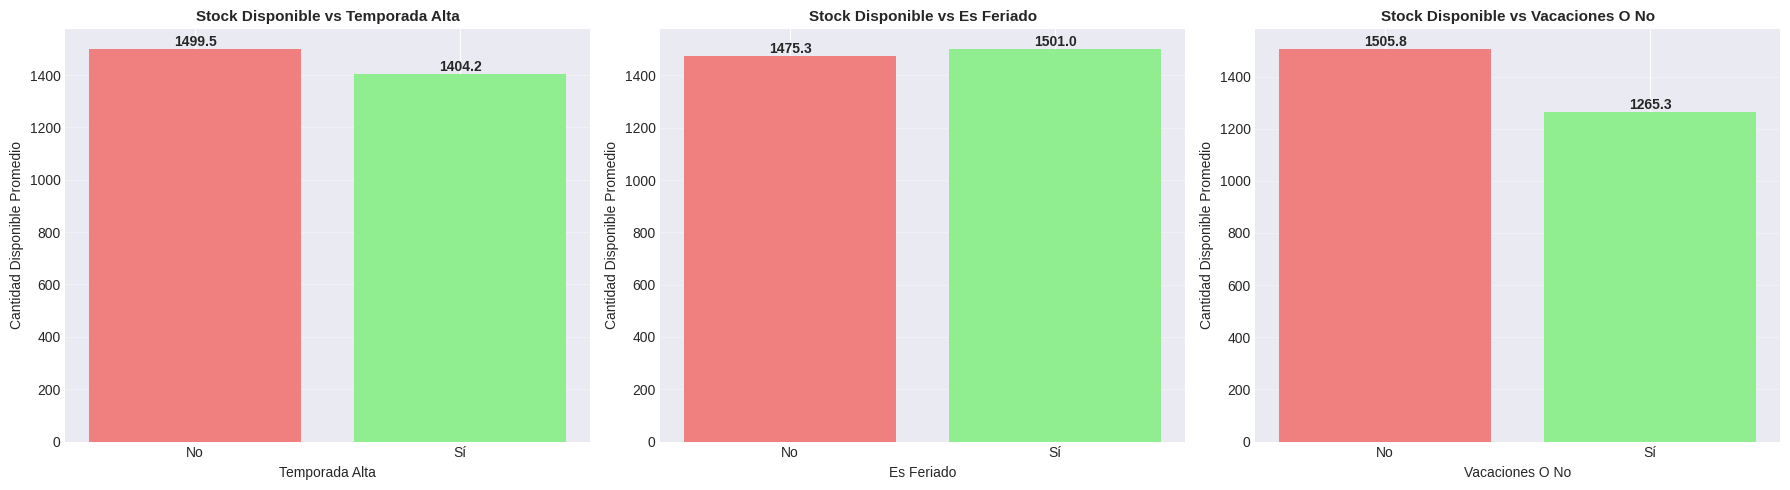

ANÁLISIS ESTADÍSTICO - IMPACTO DE FACTORES EXTERNOS

Temporada Alta:
                   mean      std  count
temporada_alta                         
False          1499.460 1317.778   5655
True           1404.151 1181.215   1845

Es Feriado:
               mean      std  count
es_feriado                         
False      1475.295 1284.640   7290
True       1500.976 1339.019    210

Vacaciones O No:
                    mean      std  count
vacaciones_o_no                         
False           1505.840 1322.396   6570
True            1265.313  967.364    930


In [23]:
# Análisis del impacto de factores externos
seasonal_factors = ['temporada_alta', 'es_feriado', 'vacaciones_o_no']
available_factors = [f for f in seasonal_factors if f in df.columns]

if available_factors and 'quantity_available' in df.columns:
    n_factors = len(available_factors)
    fig, axes = plt.subplots(1, n_factors, figsize=(6*n_factors, 5))
    
    if n_factors == 1:
        axes = [axes]
    
    for idx, factor in enumerate(available_factors):
        # Convertir a formato legible
        factor_data = df.groupby(factor)['quantity_available'].mean().sort_index()
        
        # Crear etiquetas legibles
        labels = ['No', 'Sí'] if len(factor_data) == 2 else factor_data.index
        
        axes[idx].bar(range(len(factor_data)), factor_data.values, 
                     color=['lightcoral', 'lightgreen'][:len(factor_data)])
        axes[idx].set_title(f'Stock Disponible vs {factor.replace("_", " ").title()}', 
                           fontweight='bold', fontsize=11)
        axes[idx].set_xlabel(factor.replace("_", " ").title())
        axes[idx].set_ylabel('Cantidad Disponible Promedio')
        axes[idx].set_xticks(range(len(factor_data)))
        axes[idx].set_xticklabels(labels)
        axes[idx].grid(True, alpha=0.3, axis='y')
        
        # Añadir valores sobre las barras
        for i, v in enumerate(factor_data.values):
            axes[idx].text(i, v, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Análisis estadístico
    print("ANÁLISIS ESTADÍSTICO - IMPACTO DE FACTORES EXTERNOS")
    
    for factor in available_factors:
        print(f"\n{factor.replace('_', ' ').title()}:")
        factor_stats = df.groupby(factor)['quantity_available'].agg(['mean', 'std', 'count'])
        print(factor_stats)
else:
    print("No se encontraron factores estacionales o columna de cantidad disponible.")

## 11. Análisis de Costos y Valor del Inventario

Examinamos la estructura de costos y el valor total del inventario, identificando productos de alto valor.

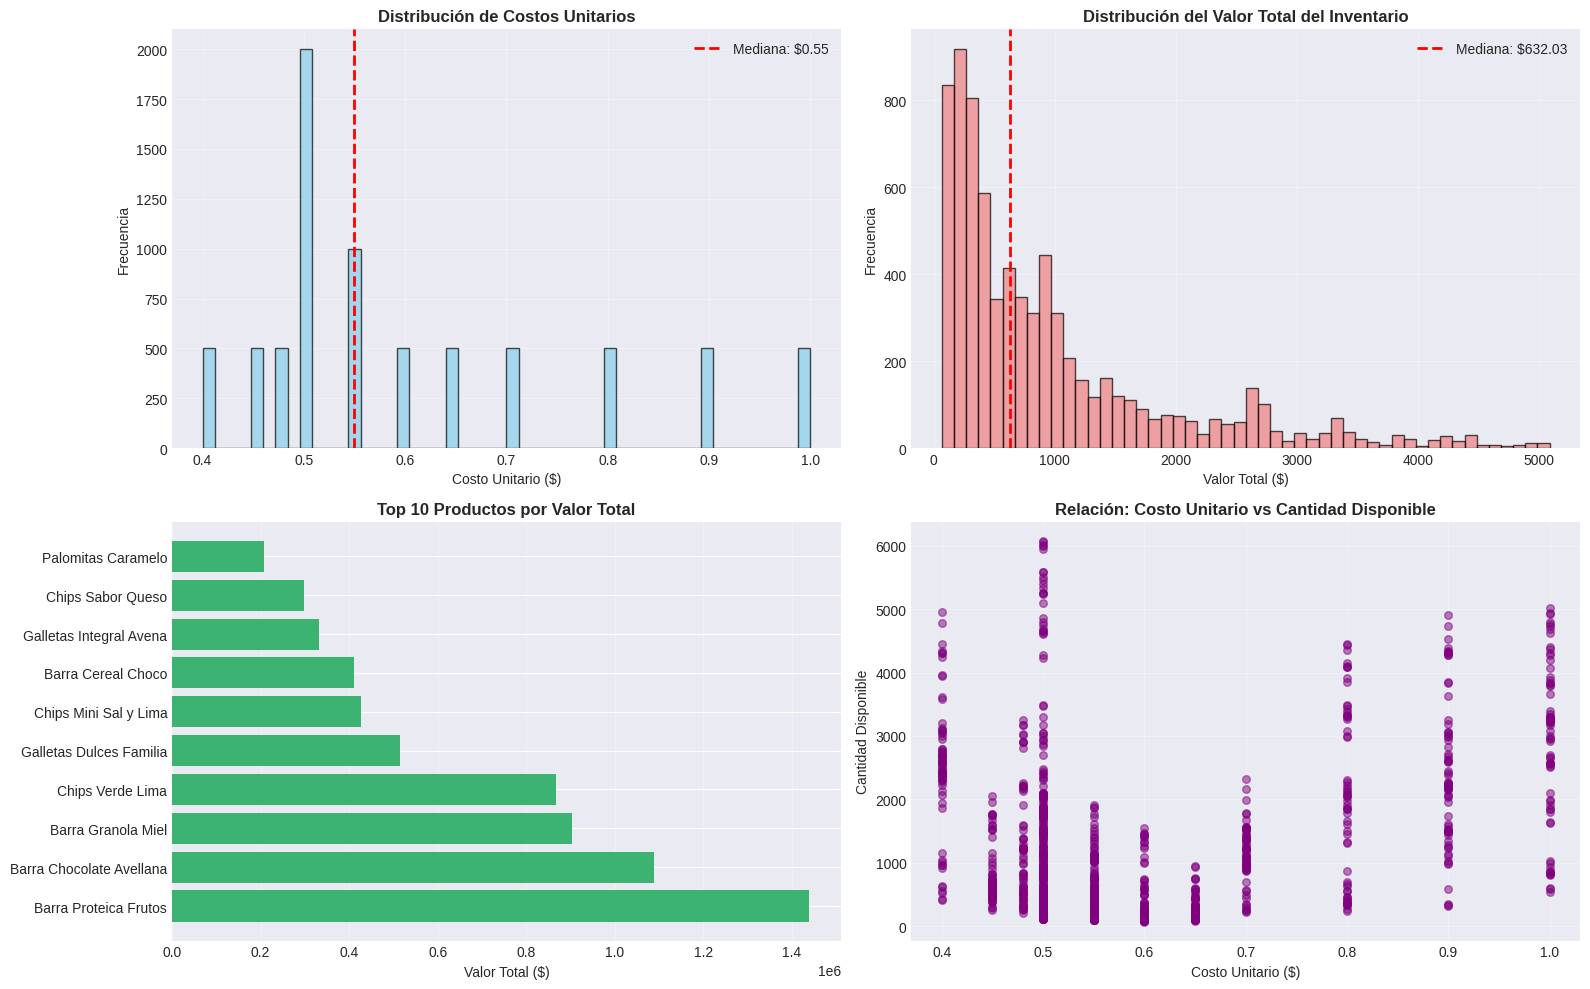

RESUMEN FINANCIERO DEL INVENTARIO

Valor Total del Inventario: $7,272,929.18
Valor Promedio por Registro: $969.72
Costo Unitario Promedio: $0.61
Costo Unitario Mediano: $0.55


In [25]:
# Análisis de costos y valor
if 'unit_cost' in df.columns and 'total_value' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Distribución de costos unitarios
    axes[0, 0].hist(df['unit_cost'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0, 0].set_title('Distribución de Costos Unitarios', fontweight='bold')
    axes[0, 0].set_xlabel('Costo Unitario ($)')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axvline(df['unit_cost'].median(), color='red', linestyle='--', 
                       linewidth=2, label=f'Mediana: ${df["unit_cost"].median():.2f}')
    axes[0, 0].legend()
    
    # Distribución de valor total
    axes[0, 1].hist(df['total_value'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
    axes[0, 1].set_title('Distribución del Valor Total del Inventario', fontweight='bold')
    axes[0, 1].set_xlabel('Valor Total ($)')
    axes[0, 1].set_ylabel('Frecuencia')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].axvline(df['total_value'].median(), color='red', linestyle='--', 
                       linewidth=2, label=f'Mediana: ${df["total_value"].median():.2f}')
    axes[0, 1].legend()
    
    # Top productos por valor total (si existe product_name)
    if 'product_name' in df.columns:
        top_value = df.groupby('product_name')['total_value'].sum().sort_values(ascending=False).head(10)
        axes[1, 0].barh(top_value.index, top_value.values, color='mediumseagreen')
        axes[1, 0].set_title('Top 10 Productos por Valor Total', fontweight='bold')
        axes[1, 0].set_xlabel('Valor Total ($)')
        axes[1, 0].grid(True, alpha=0.3, axis='x')
    
    # Relación entre costo unitario y cantidad disponible
    if 'quantity_available' in df.columns:
        sample_data = df[['unit_cost', 'quantity_available']].dropna().sample(min(1000, len(df)))
        axes[1, 1].scatter(sample_data['unit_cost'], sample_data['quantity_available'], 
                          alpha=0.5, s=30, color='purple')
        axes[1, 1].set_title('Relación: Costo Unitario vs Cantidad Disponible', fontweight='bold')
        axes[1, 1].set_xlabel('Costo Unitario ($)')
        axes[1, 1].set_ylabel('Cantidad Disponible')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Resumen estadístico de valor
    print("RESUMEN FINANCIERO DEL INVENTARIO")
    print(f"\nValor Total del Inventario: ${df['total_value'].sum():,.2f}")
    print(f"Valor Promedio por Registro: ${df['total_value'].mean():,.2f}")
    print(f"Costo Unitario Promedio: ${df['unit_cost'].mean():.2f}")
    print(f"Costo Unitario Mediano: ${df['unit_cost'].median():.2f}")
else:
    print("No se encontraron columnas de costo o valor para el análisis.")

## 12. Análisis de Niveles de Stock y Reabastecimiento

Evaluación de los niveles de stock en relación con los puntos de reorden y niveles óptimos establecidos.

ANÁLISIS DE NIVELES DE STOCK

Estadísticas de niveles de stock:
       quantity_on_hand  minimum_stock_level  reorder_point  \
count          7500.000             7500.000       7500.000   
mean           1515.789              121.333        258.000   
std            1278.526               36.857         77.911   
min             120.000               70.000        150.000   
25%             529.750               90.000        190.000   
50%            1107.000              120.000        230.000   
75%            2150.250              150.000        340.000   
max            6104.000              200.000        420.000   

       optimal_stock_level  
count             7500.000  
mean               683.333  
std                209.511  
min                400.000  
25%                500.000  
50%                600.000  
75%                900.000  
max               1100.000  


Productos por debajo del punto de reorden: 969 (12.92%)

Top 10 productos críticos (por debajo del punto 

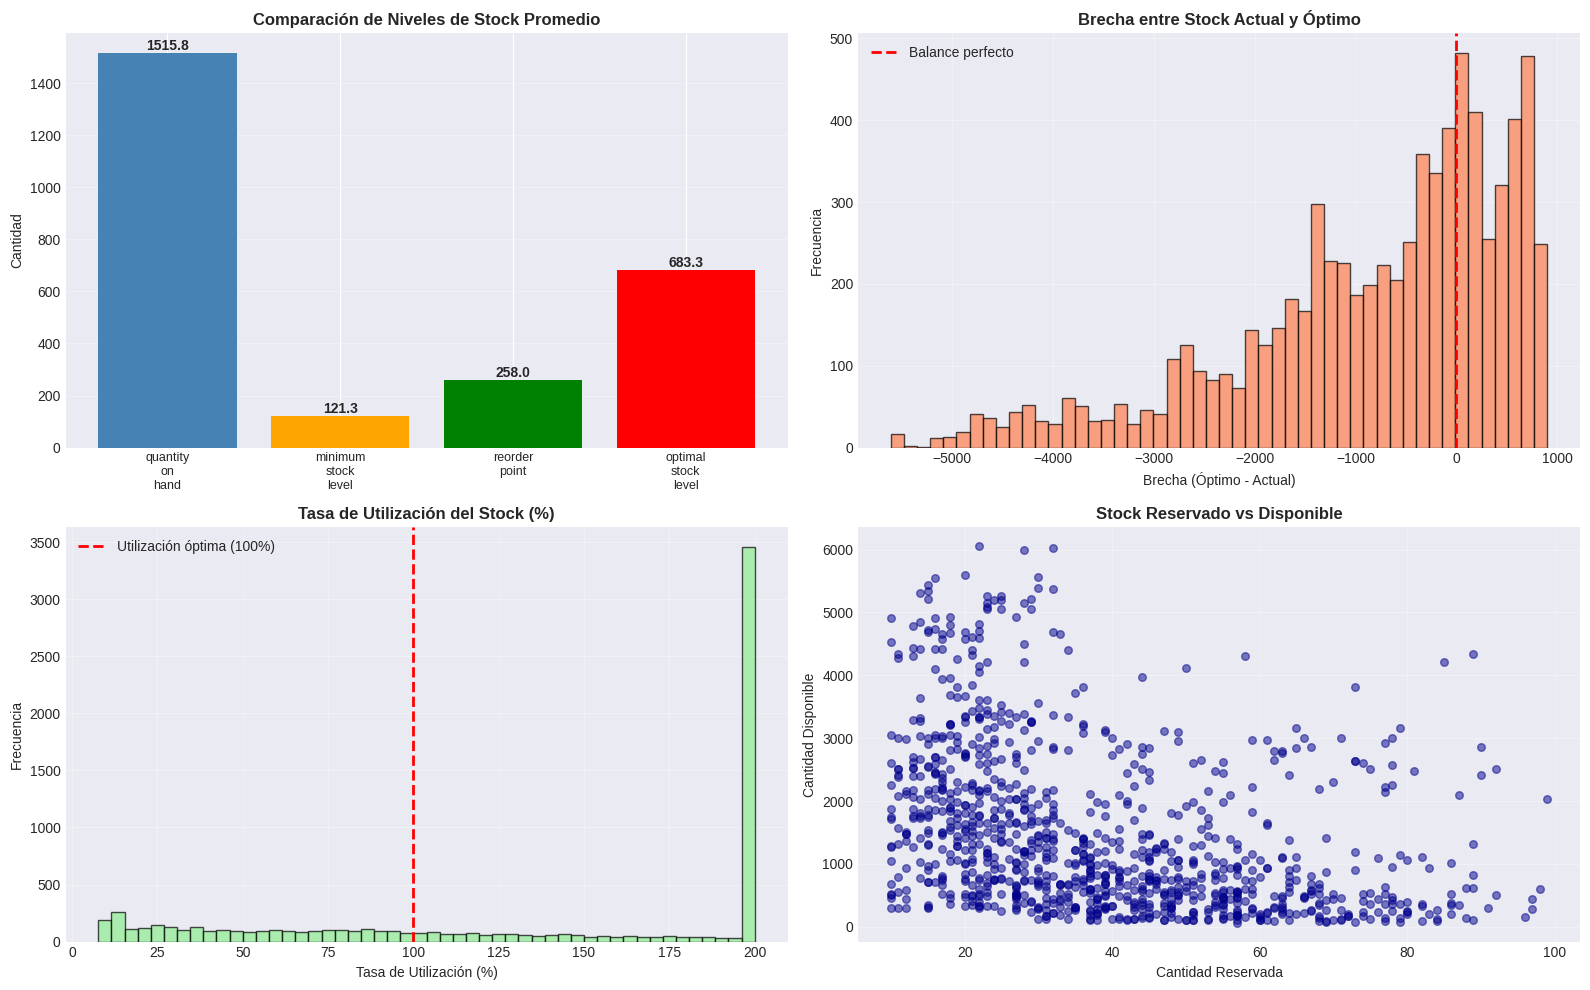

In [27]:
# Análisis de niveles de stock
stock_levels = ['quantity_on_hand', 'minimum_stock_level', 'reorder_point', 'optimal_stock_level']
available_levels = [s for s in stock_levels if s in df.columns]

if len(available_levels) >= 2:
    # Comparación de niveles de stock
    print("ANÁLISIS DE NIVELES DE STOCK")
    
    stock_comparison = df[available_levels].describe()
    print("\nEstadísticas de niveles de stock:")
    print(stock_comparison)
    
    # Identificar productos por debajo del punto de reorden
    if 'quantity_on_hand' in df.columns and 'reorder_point' in df.columns:
        below_reorder = df[df['quantity_on_hand'] < df['reorder_point']]
        print(f"\n\nProductos por debajo del punto de reorden: {len(below_reorder)} ({len(below_reorder)/len(df)*100:.2f}%)")
        
        if len(below_reorder) > 0 and 'product_name' in df.columns:
            print("\nTop 10 productos críticos (por debajo del punto de reorden):")
            critical_products = below_reorder.groupby('product_name')[['quantity_on_hand', 'reorder_point']].mean()
            critical_products['deficit'] = critical_products['reorder_point'] - critical_products['quantity_on_hand']
            print(critical_products.sort_values('deficit', ascending=False).head(10))
    
    # Visualización de niveles de stock
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Comparación de promedios
    if len(available_levels) >= 3:
        avg_levels = df[available_levels[:4]].mean()
        axes[0, 0].bar(range(len(avg_levels)), avg_levels.values, color=['steelblue', 'orange', 'green', 'red'][:len(avg_levels)])
        axes[0, 0].set_title('Comparación de Niveles de Stock Promedio', fontweight='bold')
        axes[0, 0].set_ylabel('Cantidad')
        axes[0, 0].set_xticks(range(len(avg_levels)))
        axes[0, 0].set_xticklabels([l.replace('_', '\n') for l in avg_levels.index], fontsize=9)
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Añadir valores
        for i, v in enumerate(avg_levels.values):
            axes[0, 0].text(i, v, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # Distribución de la brecha entre stock actual y óptimo
    if 'quantity_on_hand' in df.columns and 'optimal_stock_level' in df.columns:
        df['stock_gap'] = df['optimal_stock_level'] - df['quantity_on_hand']
        axes[0, 1].hist(df['stock_gap'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='coral')
        axes[0, 1].set_title('Brecha entre Stock Actual y Óptimo', fontweight='bold')
        axes[0, 1].set_xlabel('Brecha (Óptimo - Actual)')
        axes[0, 1].set_ylabel('Frecuencia')
        axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='Balance perfecto')
        axes[0, 1].grid(True, alpha=0.3)
        axes[0, 1].legend()
    
    # Tasa de utilización del stock
    if 'quantity_available' in df.columns and 'optimal_stock_level' in df.columns:
        df['utilization_rate'] = (df['quantity_available'] / df['optimal_stock_level'] * 100).clip(0, 200)
        axes[1, 0].hist(df['utilization_rate'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
        axes[1, 0].set_title('Tasa de Utilización del Stock (%)', fontweight='bold')
        axes[1, 0].set_xlabel('Tasa de Utilización (%)')
        axes[1, 0].set_ylabel('Frecuencia')
        axes[1, 0].axvline(100, color='red', linestyle='--', linewidth=2, label='Utilización óptima (100%)')
        axes[1, 0].grid(True, alpha=0.3)
        axes[1, 0].legend()
    
    # Stock reservado vs disponible
    if 'quantity_reserved' in df.columns and 'quantity_available' in df.columns:
        sample_data = df[['quantity_reserved', 'quantity_available']].dropna().sample(min(1000, len(df)))
        axes[1, 1].scatter(sample_data['quantity_reserved'], sample_data['quantity_available'], 
                          alpha=0.5, s=30, color='darkblue')
        axes[1, 1].set_title('Stock Reservado vs Disponible', fontweight='bold')
        axes[1, 1].set_xlabel('Cantidad Reservada')
        axes[1, 1].set_ylabel('Cantidad Disponible')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron suficientes columnas de niveles de stock para el análisis.")

## 13. Análisis de Proveedores

Evaluación del desempeño y distribución de proveedores en el sistema de inventario.

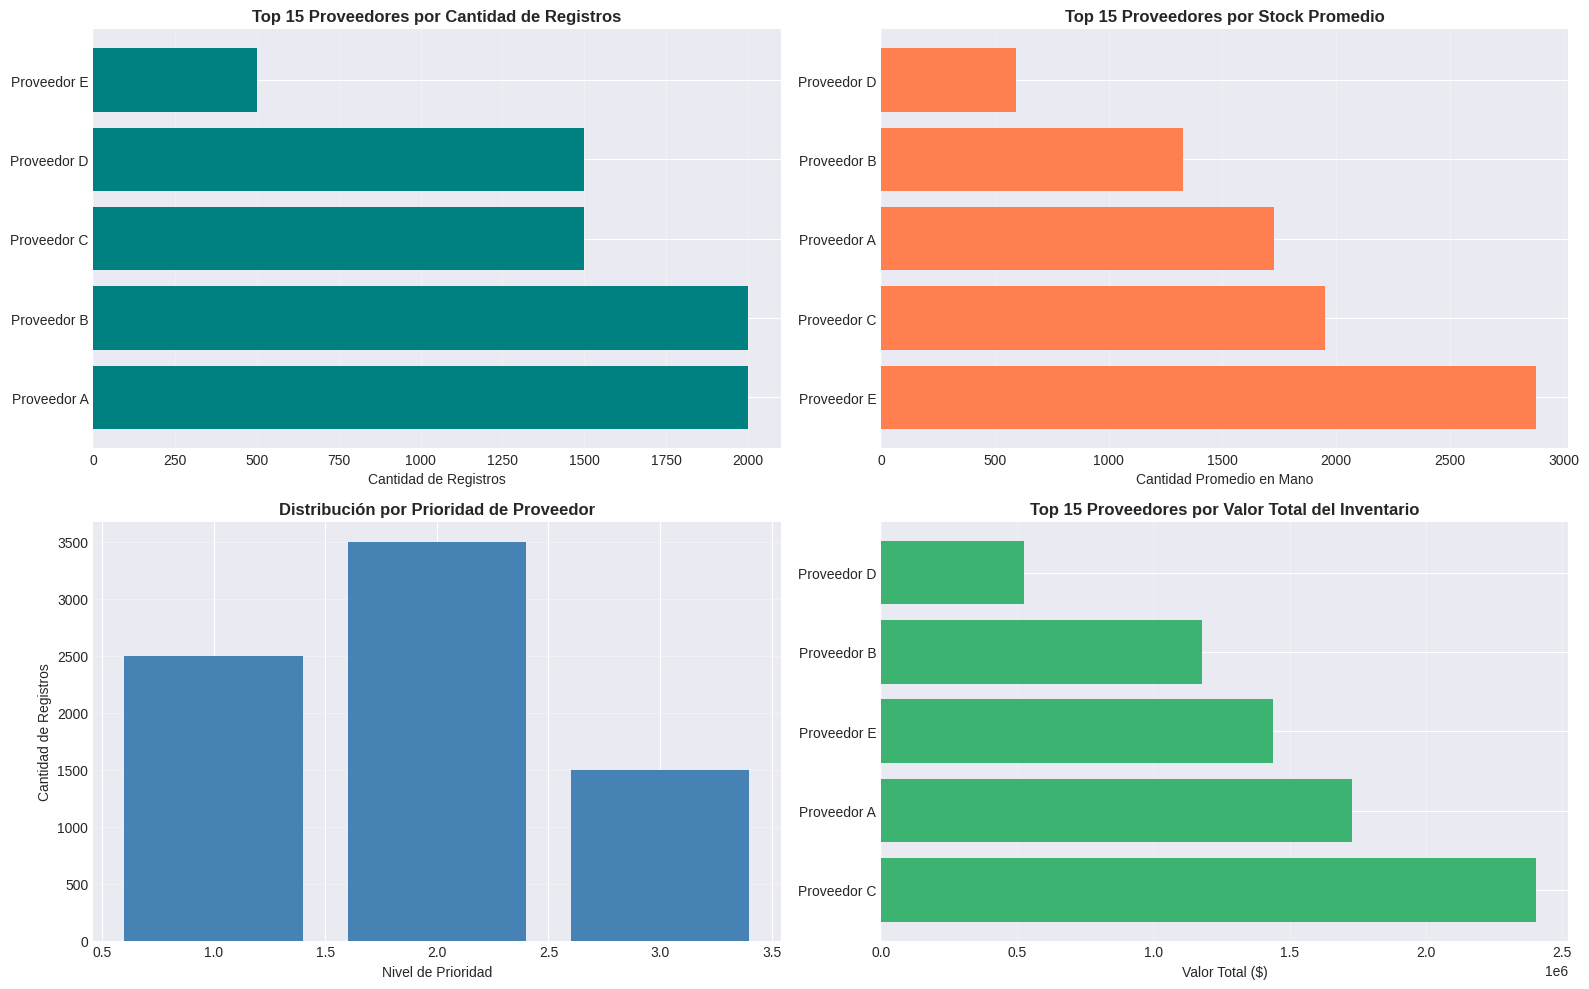

RESUMEN DE PROVEEDORES

Total de proveedores únicos: 5

Distribución por prioridad:
prioridad_proveedor
1    2500
2    3500
3    1500
Name: count, dtype: int64


In [29]:
# Análisis de proveedores
if 'supplier_name' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Distribución de proveedores
    supplier_counts = df['supplier_name'].value_counts().head(15)
    axes[0, 0].barh(supplier_counts.index, supplier_counts.values, color='teal')
    axes[0, 0].set_title('Top 15 Proveedores por Cantidad de Registros', fontweight='bold')
    axes[0, 0].set_xlabel('Cantidad de Registros')
    axes[0, 0].grid(True, alpha=0.3, axis='x')
    
    # Stock promedio por proveedor
    if 'quantity_on_hand' in df.columns:
        supplier_stock = df.groupby('supplier_name')['quantity_on_hand'].mean().sort_values(ascending=False).head(15)
        axes[0, 1].barh(supplier_stock.index, supplier_stock.values, color='coral')
        axes[0, 1].set_title('Top 15 Proveedores por Stock Promedio', fontweight='bold')
        axes[0, 1].set_xlabel('Cantidad Promedio en Mano')
        axes[0, 1].grid(True, alpha=0.3, axis='x')
    
    # Prioridad de proveedores
    if 'prioridad_proveedor' in df.columns:
        priority_dist = df['prioridad_proveedor'].value_counts().sort_index()
        axes[1, 0].bar(priority_dist.index, priority_dist.values, color='steelblue')
        axes[1, 0].set_title('Distribución por Prioridad de Proveedor', fontweight='bold')
        axes[1, 0].set_xlabel('Nivel de Prioridad')
        axes[1, 0].set_ylabel('Cantidad de Registros')
        axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Valor total por proveedor
    if 'total_value' in df.columns:
        supplier_value = df.groupby('supplier_name')['total_value'].sum().sort_values(ascending=False).head(15)
        axes[1, 1].barh(supplier_value.index, supplier_value.values, color='mediumseagreen')
        axes[1, 1].set_title('Top 15 Proveedores por Valor Total del Inventario', fontweight='bold')
        axes[1, 1].set_xlabel('Valor Total ($)')
        axes[1, 1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    # Resumen de proveedores
    print("RESUMEN DE PROVEEDORES")

    print(f"\nTotal de proveedores únicos: {df['supplier_name'].nunique()}")
    
    if 'prioridad_proveedor' in df.columns:
        print("\nDistribución por prioridad:")
        print(df['prioridad_proveedor'].value_counts().sort_index())
else:
    print("No se encontró la columna 'supplier_name'.")

## 14. Conclusiones y Hallazgos Principales

Resumen ejecutivo de los principales insights obtenidos durante el análisis exploratorio.

In [32]:
# Generar reporte de conclusiones
print("RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS")

print("\n1. CARACTERÍSTICAS DEL DATASET")
print(f"   - Total de registros: {df.shape[0]:,}")
print(f"   - Total de variables: {df.shape[1]}")
print(f"   - Variables numéricas: {len(numericas)}")
print(f"   - Variables categóricas: {len(categoricas)}")

if df.isnull().sum().sum() > 0:
    print(f"   - Registros con valores nulos: {df.isnull().any(axis=1).sum():,}")
else:
    print("   - No se detectaron valores nulos en el dataset")

print("\n2. ANÁLISIS DE INVENTARIO")
if 'quantity_on_hand' in df.columns:
    print(f"   - Stock total en mano: {df['quantity_on_hand'].sum():,.0f} unidades")
    print(f"   - Stock promedio por registro: {df['quantity_on_hand'].mean():.2f} unidades")

if 'quantity_available' in df.columns:
    print(f"   - Stock disponible total: {df['quantity_available'].sum():,.0f} unidades")
    
if 'quantity_reserved' in df.columns:
    print(f"   - Stock reservado total: {df['quantity_reserved'].sum():,.0f} unidades")

print("\n3. ANÁLISIS FINANCIERO")
if 'total_value' in df.columns:
    print(f"   - Valor total del inventario: ${df['total_value'].sum():,.2f}")
    print(f"   - Valor promedio por registro: ${df['total_value'].mean():,.2f}")

if 'unit_cost' in df.columns:
    print(f"   - Costo unitario promedio: ${df['unit_cost'].mean():.2f}")
    print(f"   - Rango de costos: ${df['unit_cost'].min():.2f} - ${df['unit_cost'].max():.2f}")

print("\n4. DIVERSIDAD DE PRODUCTOS Y PROVEEDORES")
if 'product_name' in df.columns:
    print(f"   - Productos únicos: {df['product_name'].nunique()}")
    
if 'categoria_producto' in df.columns:
    print(f"   - Categorías de productos: {df['categoria_producto'].nunique()}")
    print(f"   - Categoría más frecuente: {df['categoria_producto'].mode()[0]}")

if 'supplier_name' in df.columns:
    print(f"   - Proveedores únicos: {df['supplier_name'].nunique()}")

print("\n5. ESTADO DEL STOCK")
if 'stock_status' in df.columns:
    print("   - Distribución por estado:")
    for status, count in df['stock_status'].value_counts().items():
        print(f"     * {status}: {count:,} ({count/len(df)*100:.1f}%)")

if 'quantity_on_hand' in df.columns and 'reorder_point' in df.columns:
    below_reorder = (df['quantity_on_hand'] < df['reorder_point']).sum()
    print(f"   - Productos por debajo del punto de reorden: {below_reorder:,} ({below_reorder/len(df)*100:.1f}%)")

print("\n6. FACTORES ESTACIONALES")
if 'temporada_alta' in df.columns:
    high_season = (df['temporada_alta'] == True).sum()
    print(f"   - Registros en temporada alta: {high_season:,} ({high_season/len(df)*100:.1f}%)")

if 'es_feriado' in df.columns:
    holidays = (df['es_feriado'] == True).sum()
    print(f"   - Registros en días feriados: {holidays:,} ({holidays/len(df)*100:.1f}%)")

print("\n7. RECOMENDACIONES")
print("   - Implementar sistema de alertas para productos por debajo del punto de reorden")
print("   - Analizar patrones de demanda por categoría y temporada")
print("   - Optimizar la relación con proveedores de alta prioridad")
print("   - Revisar políticas de stock para productos de alto valor")
print("   - Considerar análisis predictivo para mejorar la gestión de inventario")

print("Análisis completado exitosamente.")

RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS

1. CARACTERÍSTICAS DEL DATASET
   - Total de registros: 7,500
   - Total de variables: 39
   - Variables numéricas: 19
   - Variables categóricas: 15
   - No se detectaron valores nulos en el dataset

2. ANÁLISIS DE INVENTARIO
   - Stock total en mano: 11,368,414 unidades
   - Stock promedio por registro: 1515.79 unidades
   - Stock disponible total: 11,070,107 unidades
   - Stock reservado total: 298,307 unidades

3. ANÁLISIS FINANCIERO
   - Valor total del inventario: $7,272,929.18
   - Valor promedio por registro: $969.72
   - Costo unitario promedio: $0.61
   - Rango de costos: $0.40 - $1.00

4. DIVERSIDAD DE PRODUCTOS Y PROVEEDORES
   - Productos únicos: 15
   - Categorías de productos: 1
   - Categoría más frecuente: Snacks
   - Proveedores únicos: 5

5. ESTADO DEL STOCK
   - Distribución por estado:
     * activo: 7,500 (100.0%)
   - Productos por debajo del punto de reorden: 969 (12.9%)

6. FACTORES ESTACIONALES
   - Registros